### Regularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


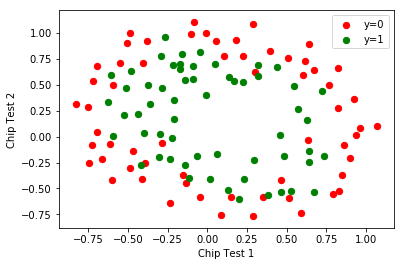

In [1]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

import matplotlib.pyplot as plt
import plot_utils

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()
#plt.savefig('fig3.pdf')

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Theta found by fmin_bfgs:  [ 0.32617622 -0.00818412  0.16576245 -0.44671253 -0.11184499 -0.27889549
 -0.07141464 -0.05796267 -0.06515769 -0.10636125 -0.3367737  -0.01298218
 -0.11677557 -0.02812652 -0.28605514 -0.11612309 -0.03708065 -0.02244028
 -0.0489023  -0.0416696  -0.18673753 -0.2533692  -0.0029125  -0.05800253
 -0.00053336 -0.06356787 -0.01208223 -0.27149275]
Final loss =  0.616390599914


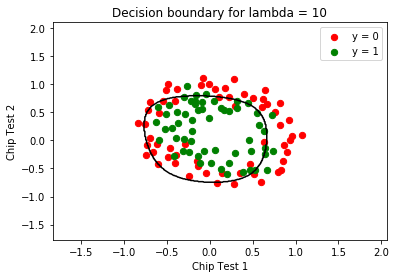

In [6]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 10
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print 'Theta found by fmin_bfgs: ',theta_opt
print "Final loss = ", reg_lr1.loss(theta_opt,XX,y,0.0)

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()
#plt.savefig('fig4.pdf')

In [3]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = np.mean(predy == y)
print "Accuracy on the training set = ", accuracy

Accuracy on the training set =  0.610169491525


### Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg:  [ 0.00468635 -0.01726848  0.0064196  -0.05402665 -0.01327551 -0.03727145
 -0.01821195 -0.00761037 -0.00885306 -0.02224573 -0.04288369 -0.00238585
 -0.01393196 -0.00354828 -0.04072376 -0.02078577 -0.00467203 -0.00354978
 -0.00624894 -0.00500393 -0.03153159 -0.03381515 -0.00108319 -0.00694192
 -0.0003945  -0.00788595 -0.00157683 -0.04058858]
Loss with sklearn theta:  0.68061702032


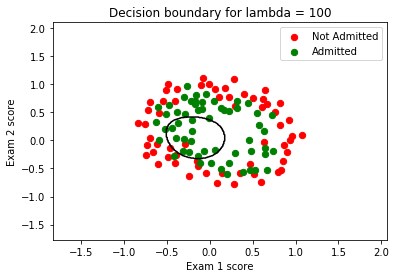

In [4]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg = 100

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print "Theta found by sklearn with L2 reg: ", sk_logreg_l2.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0)

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
#plt.savefig('fig4_sk.pdf')


### L1 regularized logistic regre

Theta found by sklearn with L1 reg:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Loss with sklearn theta:  0.69314718056
Computing regularization path ...


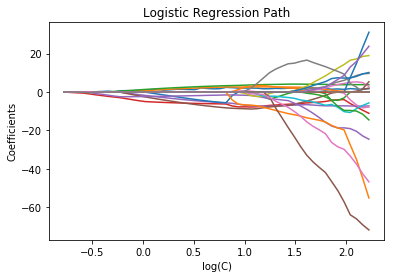

In [5]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print "Theta found by sklearn with L1 reg: ", sk_logreg_l1.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0)

# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
plt.show()
#plt.savefig('fig5.pdf')